# Import the Required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
# load_figure_template('MINTY')

# Data reading

### reading the CSV

In [2]:
Data = pd.read_excel('Date_Fruit_Datasets.xlsx')

print('Shape of DataFrame:', Data.shape)
print('Size of DataFrame:', Data.size)


Shape of DataFrame: (898, 35)
Size of DataFrame: 31430


### checking first five rows

In [3]:
Data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


### checking last five rows

In [4]:
Data.tail()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY
897,343792,2289.2720,823.8438,534.7757,0.7607,661.6113,0.9781,351472,0.6941,1.5405,...,2.5138,3.0369,3.0865,-31983476736,-20482514944,-21219354624,47.3454,38.6966,39.6738,SOGAY


### concise summary of our dataset

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

### Describing the Data

In [6]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA,898.0,2.982952e+05,1.072452e+05,1.987000e+03,2.069480e+05,3.198330e+05,3.825730e+05,5.460630e+05
PERIMETER,898.0,2.057661e+03,4.100125e+02,9.118280e+02,1.726091e+03,2.196345e+03,2.389717e+03,2.811997e+03
MAJOR_AXIS,898.0,7.508120e+02,1.440593e+02,3.367227e+02,6.410686e+02,7.913634e+02,8.586338e+02,1.222723e+03
MINOR_AXIS,898.0,4.958728e+02,1.142689e+02,2.283200e+00,4.046844e+02,4.950548e+02,5.890317e+02,7.664536e+02
ECCENTRICITY,898.0,7.374678e-01,8.872739e-02,3.448000e-01,6.856250e-01,7.547000e-01,8.021500e-01,1.000000e+00
EQDIASQ,898.0,6.045779e+02,1.195939e+02,5.029840e+01,5.133171e+02,6.381409e+02,6.979305e+02,8.338279e+02
SOLIDITY,898.0,9.818403e-01,1.815742e-02,8.366000e-01,9.788250e-01,9.873000e-01,9.918000e-01,9.974000e-01
CONVEX_AREA,898.0,3.038456e+05,1.088157e+05,2.257000e+03,2.100228e+05,3.272070e+05,3.888040e+05,5.525980e+05
EXTENT,898.0,7.362671e-01,5.374518e-02,5.123000e-01,7.058750e-01,7.469500e-01,7.758500e-01,8.562000e-01
ASPECT_RATIO,898.0,2.131102e+00,1.782078e+01,1.065300e+00,1.373725e+00,1.524150e+00,1.674750e+00,5.355257e+02


### checking for null values

In [7]:
Data.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64

### Checking if there are duplicates

In [8]:
Data.duplicated().sum()

0

In [9]:
Data.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

# Data ploting

## Heatmap

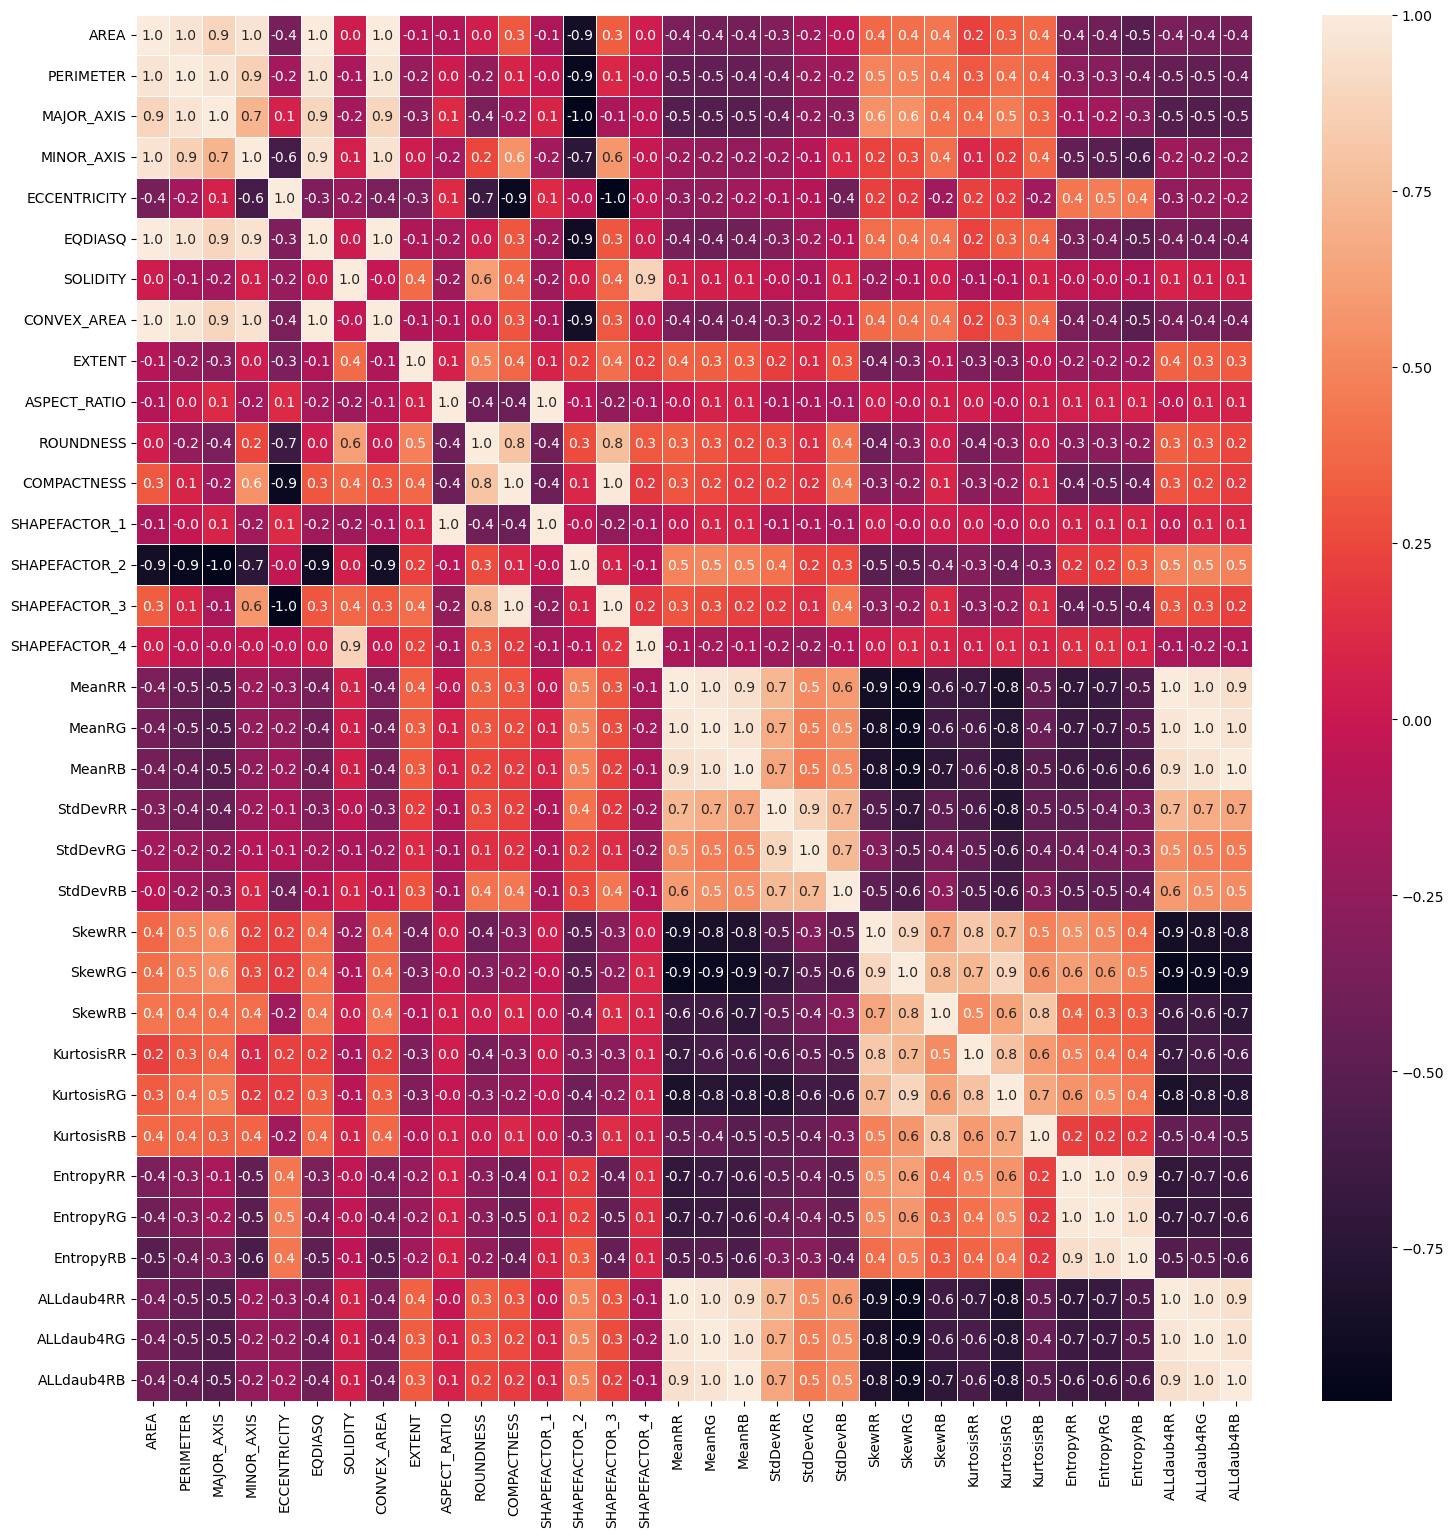

In [10]:
ig,ax = plt.subplots(figsize=(18, 18))
axes = sns.heatmap(Data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [11]:
# sns.barplot(y=Data["Class"].value_counts().index,x=Data["Class"].value_counts().values);

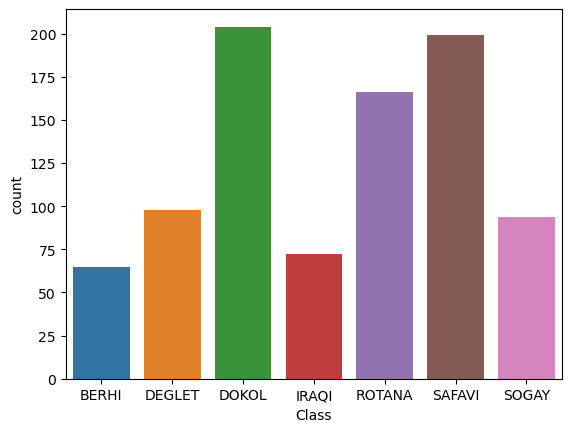

In [12]:
sns.countplot(x=Data["Class"]);

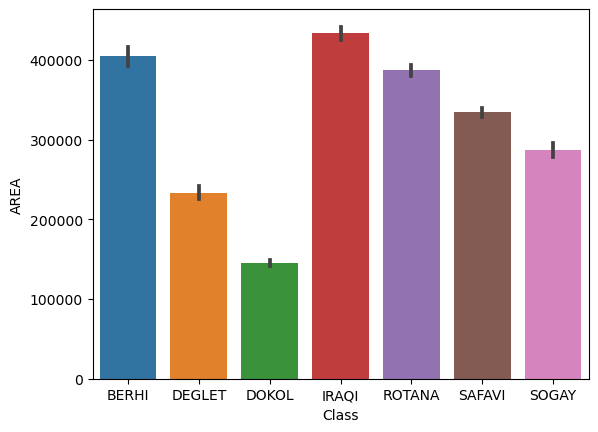

In [13]:
sns.barplot(x=Data['Class'],y=Data['AREA']);

# Machine Learning modeling

In [32]:
X = Data.drop(['Class'],axis=1)
y = Data[['Class']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 20)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (718, 34)
The shape of X_test is        (180, 34)
The shape of y_train is       (718, 1)
The shape of y_test is        (180, 1)


### Logistic Regression model

In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        16
      DEGLET       0.00      0.00      0.00        15
       DOKOL       0.72      0.43      0.54        42
       IRAQI       0.38      0.36      0.37        14
      ROTANA       0.40      0.92      0.56        37
      SAFAVI       0.88      0.85      0.86        41
       SOGAY       0.47      0.53      0.50        15

    accuracy                           0.56       180
   macro avg       0.41      0.44      0.40       180
weighted avg       0.52      0.56      0.51       180



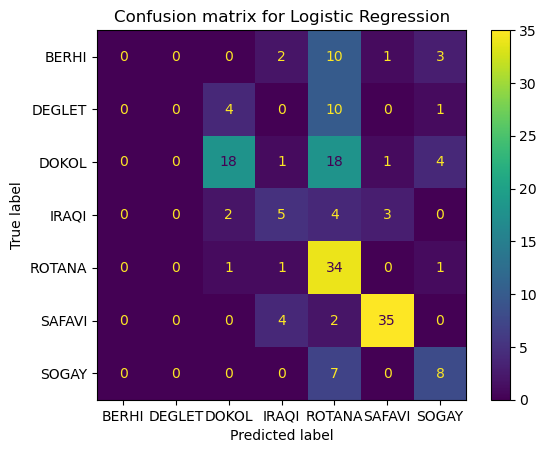

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lr.classes_)
disp.plot()
plt.title('Confusion matrix for Logistic Regression')
plt.show()

### Check for overfitting

In [44]:
# evaluate on the train dataset
train_yhat = lr.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print('training accuracy',train_acc)
 # evaluate on the test dataset
test_yhat = lr.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print('testing accuracy',test_acc)

training accuracy 0.5557103064066853
testing accuracy 0.5555555555555556


## Decision Tree Classifier

In [16]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
import six
import sys
from IPython.display import Image
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=y_train['Class'].unique())

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')

True

In [18]:
y_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       BERHI       0.85      0.69      0.76        16
      DEGLET       0.50      0.40      0.44        15
       DOKOL       0.83      0.95      0.89        42
       IRAQI       0.60      0.86      0.71        14
      ROTANA       0.97      0.84      0.90        37
      SAFAVI       1.00      0.98      0.99        41
       SOGAY       0.40      0.40      0.40        15

    accuracy                           0.81       180
   macro avg       0.74      0.73      0.73       180
weighted avg       0.82      0.81      0.81       180



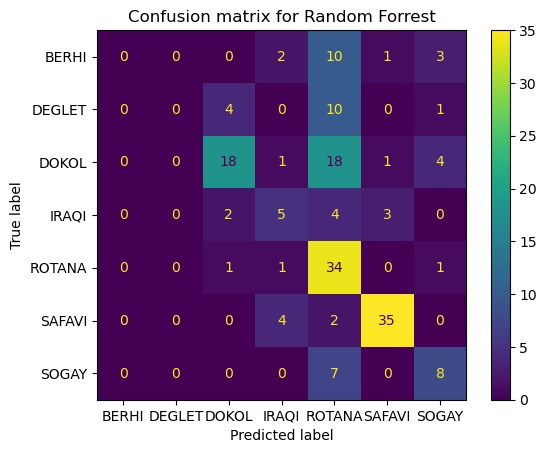

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt.classes_)
disp.plot()
plt.title('Confusion matrix for Random Forrest')
plt.show()

### Check for overfitting

In [46]:
# evaluate on the train dataset
train_yhat = dt.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print('training accuracy',train_acc)
 # evaluate on the test dataset
test_yhat = dt.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print('testing accuracy',test_acc)

training accuracy 1.0
testing accuracy 0.8111111111111111


### Random Forrest model

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
y_pred = rf.predict(X_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       BERHI       0.85      0.69      0.76        16
      DEGLET       0.67      0.53      0.59        15
       DOKOL       0.89      1.00      0.94        42
       IRAQI       0.80      0.86      0.83        14
      ROTANA       0.95      0.97      0.96        37
      SAFAVI       1.00      1.00      1.00        41
       SOGAY       0.79      0.73      0.76        15

    accuracy                           0.89       180
   macro avg       0.85      0.83      0.83       180
weighted avg       0.89      0.89      0.89       180



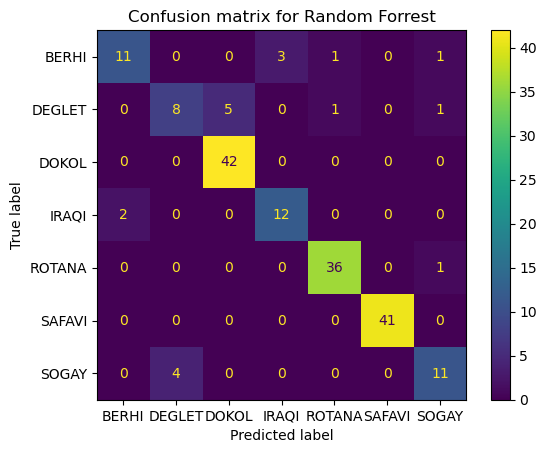

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.title('Confusion matrix for Random Forrest')
plt.show()

### Check for overfitting

In [47]:
# evaluate on the train dataset
train_yhat = rf.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print('training accuracy',train_acc)
 # evaluate on the test dataset
test_yhat = rf.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print('testing accuracy',test_acc)

training accuracy 1.0
testing accuracy 0.8944444444444445


## KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       BERHI       0.00      0.00      0.00        16
      DEGLET       0.37      0.67      0.48        15
       DOKOL       0.63      0.79      0.70        42
       IRAQI       0.58      0.50      0.54        14
      ROTANA       0.78      0.78      0.78        37
      SAFAVI       0.95      0.93      0.94        41
       SOGAY       0.50      0.27      0.35        15

    accuracy                           0.67       180
   macro avg       0.55      0.56      0.54       180
weighted avg       0.64      0.67      0.65       180



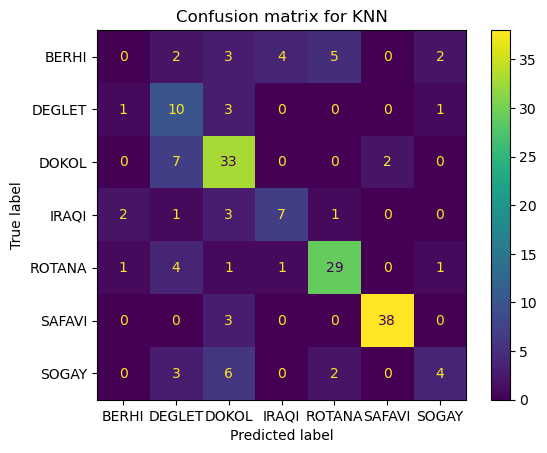

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.title('Confusion matrix for KNN')
plt.show()

### Check for overfitting

In [48]:
# evaluate on the train dataset
train_yhat = knn.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
print('training accuracy',train_acc)
 # evaluate on the test dataset
test_yhat = knn.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
print('testing accuracy',test_acc)

training accuracy 0.7576601671309192
testing accuracy 0.6722222222222223


In [40]:
from sklearn import metrics
models = []
models.append(KNeighborsClassifier())
models.append(tree.DecisionTreeClassifier())
models.append(RandomForestClassifier())
models.append(LogisticRegression())

model_list = ['KNN', 'Decision Tree', 'Random Forest','Logistic Regression']
acc_list = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))

In [41]:
result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list})
result_df

,Model,Accuracy
0,KNN,0.672222
1,Decision Tree,0.827778
2,Random Forest,0.883333
3,Logistic Regression,0.555556


In [43]:
import plotly.express as px
px.bar(data_frame=result_df,x='Model',y='Accuracy',title='Accuracy of each model')

# Conclusions

Random Forrest achieved the highest accuracy score but it has a 10% differnce between the train accuracy and the test accuracy